# Work Flow

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle

### Data Collection and Processing

In [2]:
# load the dataset to a pandas dataframe
data = pd.read_csv("Rainfall.csv")

In [3]:
data

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7
...,...,...,...,...,...,...,...,...,...,...,...,...
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9


In [4]:
data.shape

(366, 12)

In [5]:
data.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7


In [6]:
data.tail()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
361,27,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,28,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,29,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,30,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9
365,31,1026.4,20.5,17.8,15.5,13.0,74,66,no,5.7,20.0,23.3


In [7]:
data["day"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [9]:
# remove extra spaces in all columns
data.columns = data.columns.str.strip()

In [10]:
data.columns

Index(['day', 'pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint',
       'humidity', 'cloud', 'rainfall', 'sunshine', 'winddirection',
       'windspeed'],
      dtype='object')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   day            366 non-null    int64  
 1   pressure       366 non-null    float64
 2   maxtemp        366 non-null    float64
 3   temparature    366 non-null    float64
 4   mintemp        366 non-null    float64
 5   dewpoint       366 non-null    float64
 6   humidity       366 non-null    int64  
 7   cloud          366 non-null    int64  
 8   rainfall       366 non-null    object 
 9   sunshine       366 non-null    float64
 10  winddirection  365 non-null    float64
 11  windspeed      365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [12]:
data = data.drop(columns = ["day"])

In [13]:
data

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7
...,...,...,...,...,...,...,...,...,...,...,...
361,1022.7,18.8,17.7,16.9,15.0,84,90,yes,0.0,30.0,18.4
362,1026.6,18.6,17.3,16.3,12.8,75,85,yes,1.0,20.0,25.9
363,1025.9,18.9,17.7,16.4,13.3,75,78,yes,4.6,70.0,33.4
364,1025.3,19.2,17.3,15.2,13.3,78,86,yes,1.2,20.0,20.9


In [14]:
# checking the number of missing values
data.isnull().sum()

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64

In [15]:
data["winddirection"].unique()

array([ 80.,  50.,  40.,  20.,  30.,  60.,  70.,  10., 200., 220., 120.,
       190., 210., 300., 240., 180., 230.,  90., 170., 150., 100., 130.,
        nan, 160., 270., 280., 250., 260., 290., 350., 110., 140.])

In [16]:
# handle the missing values
data["winddirection"] = data["winddirection"].fillna(data["winddirection"].mode()[0])
data["windspeed"] = data["windspeed"].fillna(data["windspeed"].median())

In [17]:
# checking the number of missing values
data.isnull().sum()

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    0
windspeed        0
dtype: int64

In [18]:
data["rainfall"].unique()

array(['yes', 'no'], dtype=object)

In [19]:
# converting the yes and no to 1 and 0 resp.
data["rainfall"] = data["rainfall"].map({"yes": 1, "no": 0})

In [20]:
data.head()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,19.9,18.3,16.8,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,21.7,18.9,17.2,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,20.3,19.3,18.0,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,22.3,20.6,19.1,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,21.3,20.7,20.2,19.9,95,81,1,0.0,40.0,13.7


### Exploratory Data Analysis(EDA)

In [21]:
data.shape

(366, 11)

In [22]:
# setting plt style for all the plots 
sns.set(style="whitegrid")

In [23]:
data.describe()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,0.680328,4.419399,101.284153,21.534153
std,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,0.466988,3.934398,81.722827,10.056054
min,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,0.000000,10.000000,4.400000
25%,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.000000,0.500000,40.000000,13.725000
50%,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,1.000000,3.500000,70.000000,20.500000
75%,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,1.000000,8.200000,190.000000,27.825000
max,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,1.000000,12.100000,350.000000,59.500000


In [24]:
data.columns

Index(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'rainfall', 'sunshine', 'winddirection', 'windspeed'],
      dtype='object')

ValueError: num must be an integer with 1 <= num <= 9, not 10

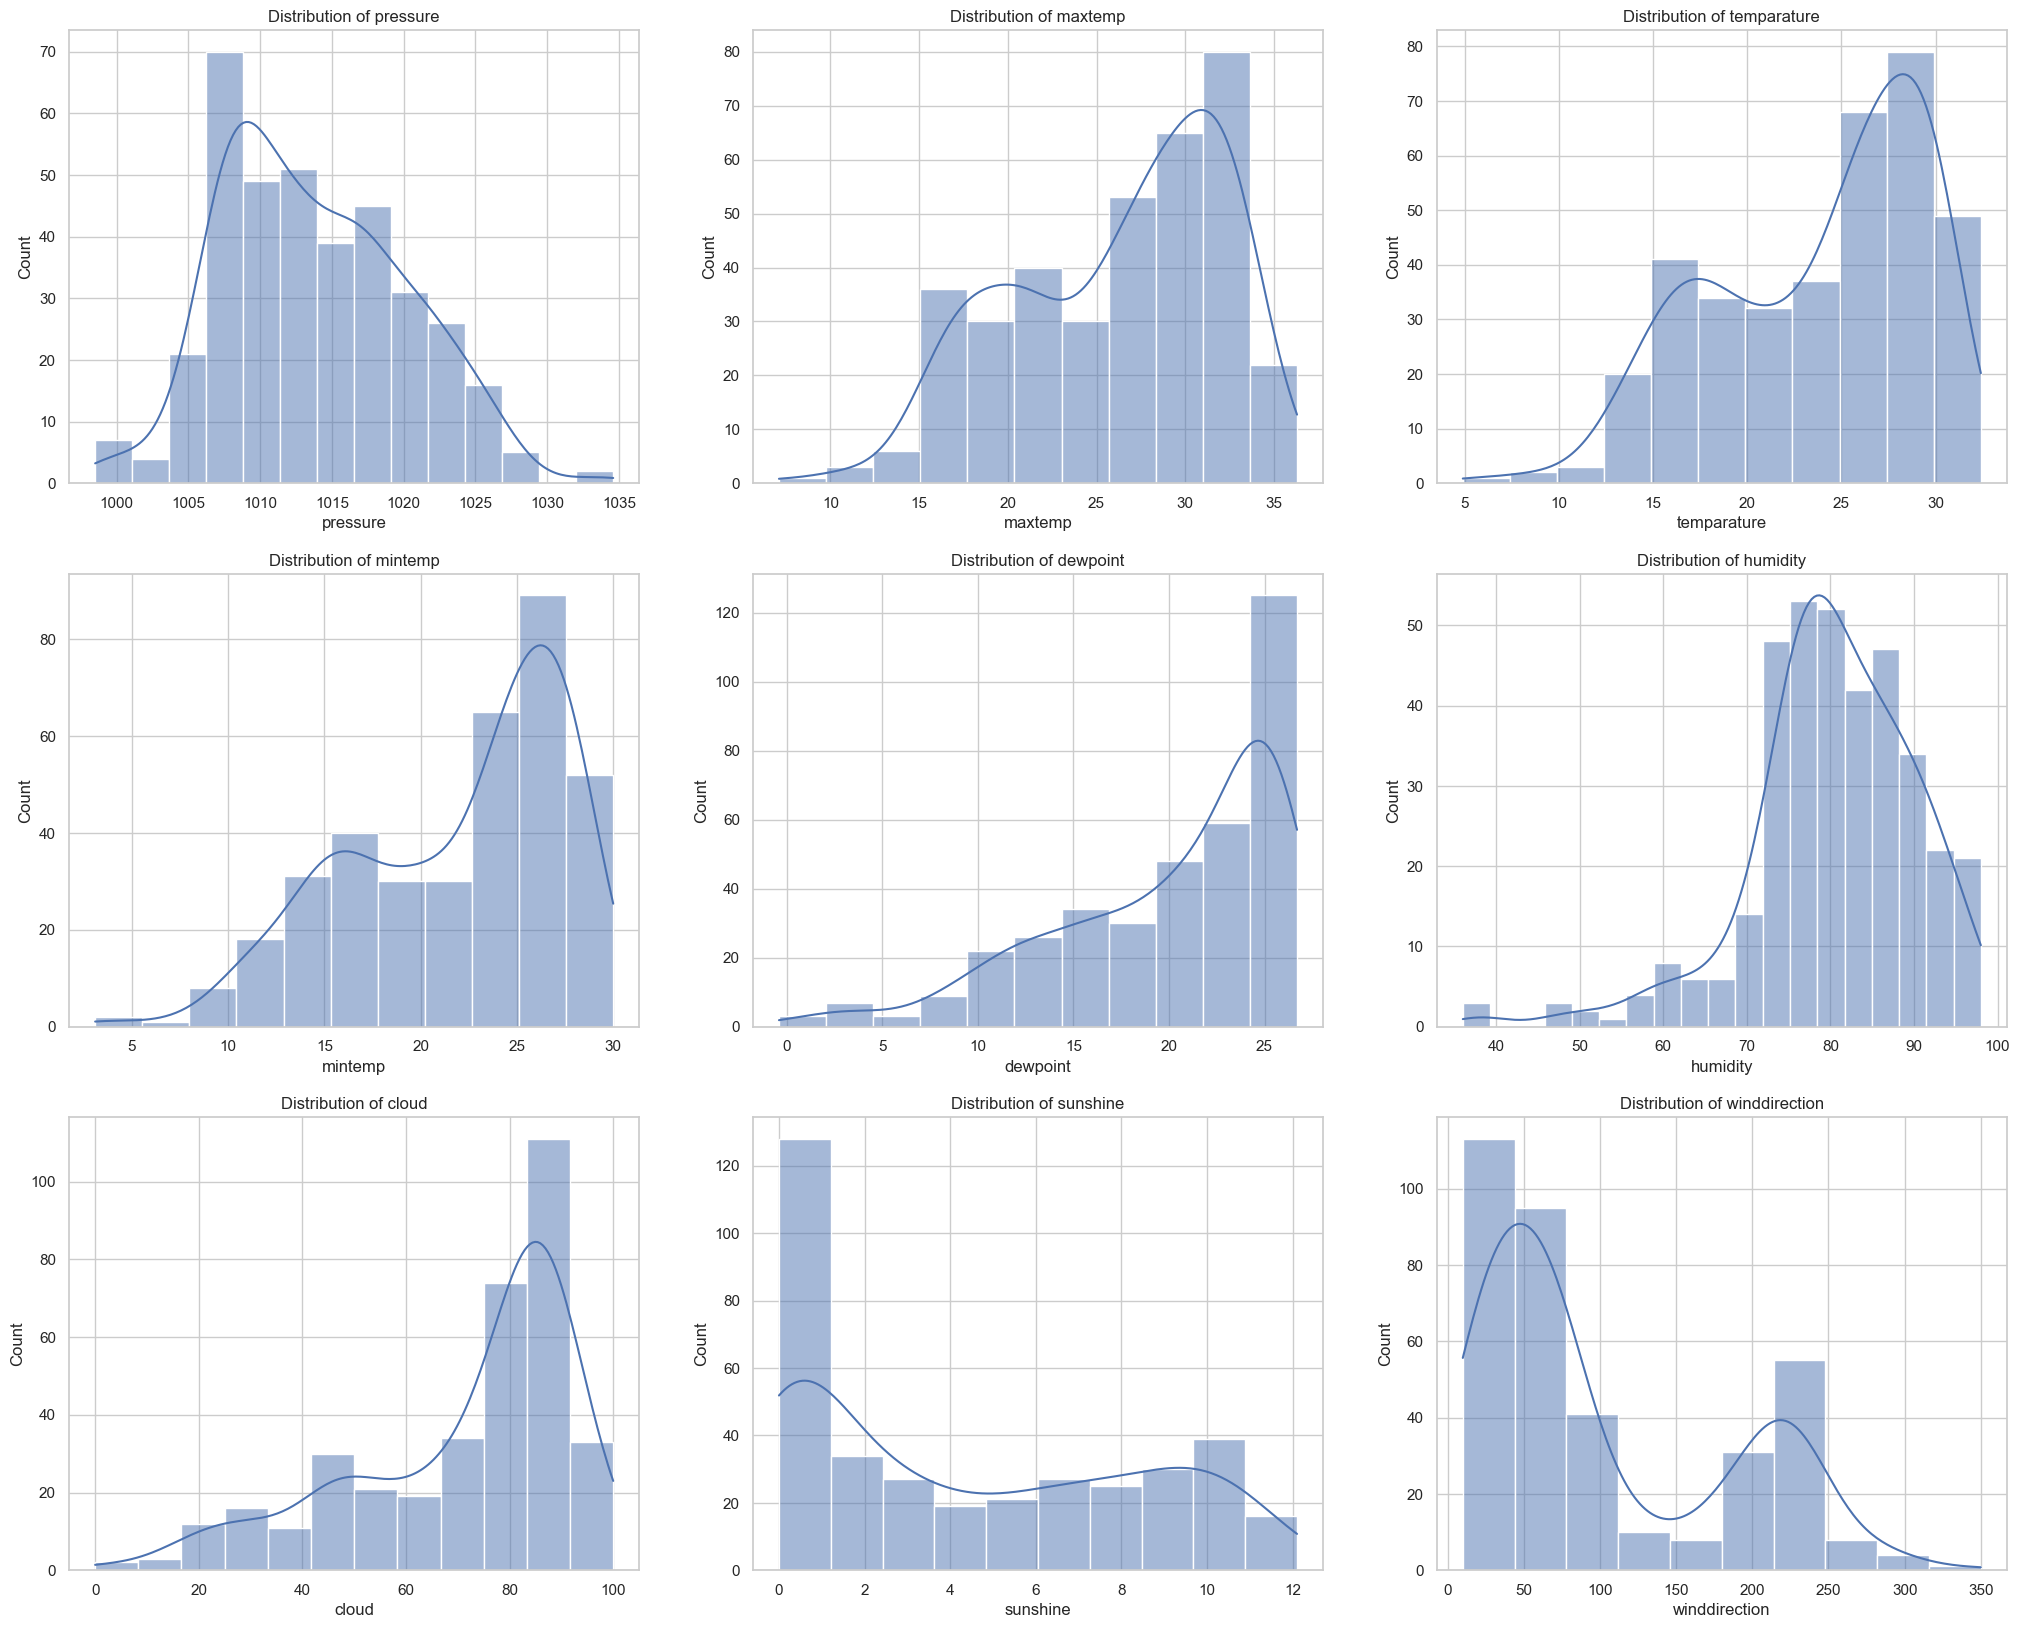

In [26]:
plt.figure(figsize = (25,20))

for i , column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'sunshine', 'winddirection', 'windspeed'], 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[column], kde=True)
    plt.title(f"Distribution of {column}")

plt.tight_layout()
plt.show()

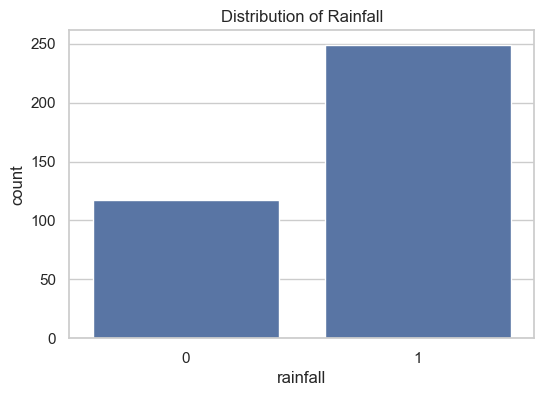

In [27]:
plt.figure(figsize =(6,4))
sns.countplot(x = "rainfall", data = data)
plt.title("Distribution of Rainfall")
plt.show()

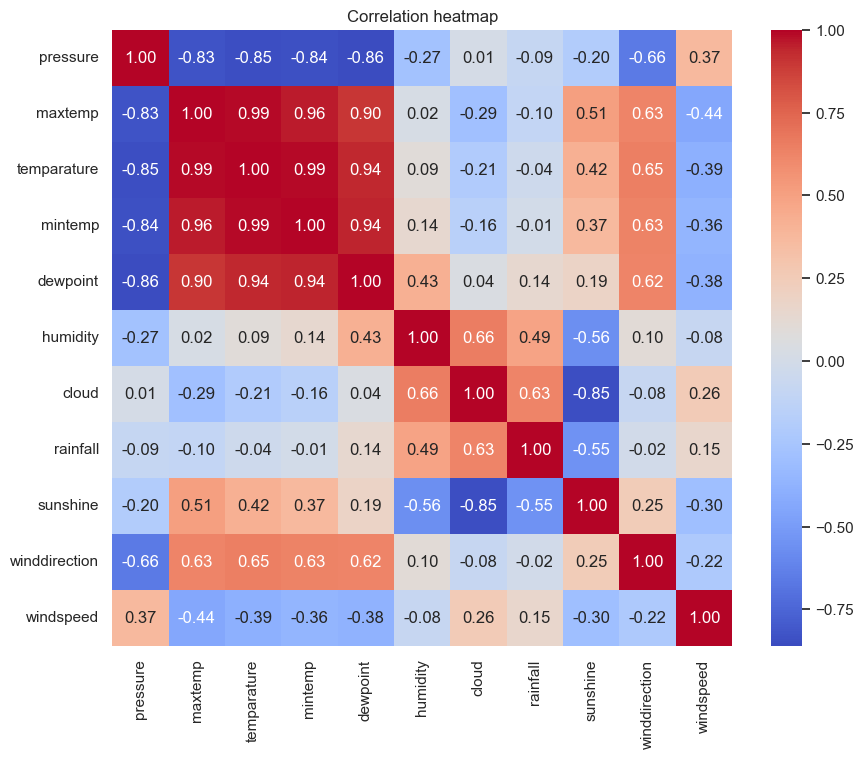

In [28]:
# correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation heatmap")
plt.show()

ValueError: num must be an integer with 1 <= num <= 9, not 10

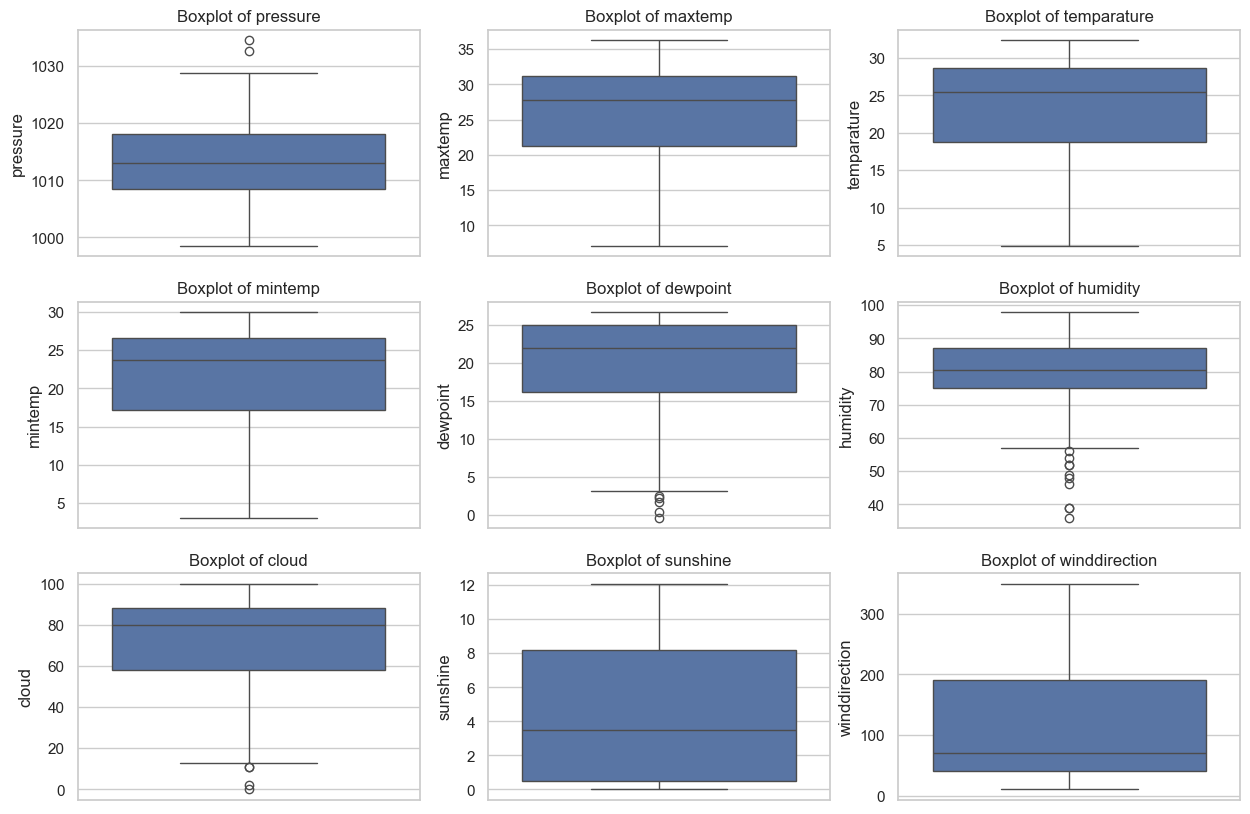

In [29]:
plt.figure(figsize = (15,10))

for i , column in enumerate(['pressure', 'maxtemp', 'temparature', 'mintemp', 'dewpoint', 'humidity',
       'cloud', 'sunshine', 'winddirection', 'windspeed'], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data[column])
    plt.title(f"Boxplot of {column}")

plt.tight_layout()
plt.show()

### Data Preprocessing

In [30]:
# drop highly correlated column
data = data.drop(columns=["maxtemp","temparature","mintemp"])

In [31]:
data.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1025.9,13.1,72,49,1,9.3,80.0,26.3
1,1022.0,15.6,81,83,1,0.6,50.0,15.3
2,1019.7,18.4,95,91,1,0.0,40.0,14.2
3,1018.9,18.8,90,88,1,1.0,50.0,16.9
4,1015.9,19.9,95,81,1,0.0,40.0,13.7


In [32]:
data["rainfall"].value_counts()

rainfall
1    249
0    117
Name: count, dtype: int64

In [33]:
# seperate majority and minority class
df_majority = data[data["rainfall"] == 1]
df_minority = data[data["rainfall"] == 0]

In [34]:
df_majority.shape

(249, 8)

In [35]:
df_minority.shape

(117, 8)

In [36]:
# downsample majority class to match minority count

df_majority_downsampled = resample(df_majority, replace=False, n_samples = len(df_minority), random_state = 42)

In [37]:
df_majority_downsampled.shape

(117, 8)

In [40]:
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

In [41]:
df_downsampled.shape

(234, 8)

In [42]:
df_downsampled.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
188,1005.9,25.6,77,53,1,10.5,270.0,11.3
9,1017.5,15.5,85,91,1,0.0,70.0,37.7
137,1012.3,20.1,80,86,1,0.3,80.0,39.5
89,1018.3,16.3,79,89,1,2.4,40.0,14.8
157,1008.8,24.7,91,80,1,2.2,20.0,11.2


In [44]:
# shuffling the final dataframe
df_downsampled = df_downsampled.sample(frac = 1, random_state = 42).reset_index(drop=True)

In [45]:
df_downsampled.head()

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1004.2,26.6,81,88,1,2.4,220.0,30.0
1,1008.1,25.6,79,43,0,9.7,240.0,24.9
2,1027.1,3.4,70,95,1,0.0,20.0,55.5
3,1017.0,22.9,84,58,1,5.9,70.0,22.1
4,1011.3,20.9,70,45,1,7.1,20.0,20.4


In [46]:
df_downsampled["rainfall"].value_counts()

rainfall
1    117
0    117
Name: count, dtype: int64

In [47]:
# split feature and target as X and Y
X = df_downsampled.drop(columns=["rainfall"])
Y = df_downsampled["rainfall"]

In [48]:
X

,pressure,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1004.2,26.6,81,88,2.4,220.0,30.0
1,1008.1,25.6,79,43,9.7,240.0,24.9
2,1027.1,3.4,70,95,0.0,20.0,55.5
3,1017.0,22.9,84,58,5.9,70.0,22.1
4,1011.3,20.9,70,45,7.1,20.0,20.4
...,...,...,...,...,...,...,...
229,1014.1,25.4,97,86,0.4,100.0,30.4
230,1005.6,20.0,56,53,10.4,230.0,15.5
231,1002.2,25.5,77,70,7.7,350.0,13.6
232,1020.8,7.2,54,29,10.2,40.0,17.2


In [49]:
Y

0      1
1      0
2      1
3      1
4      1
      ..
229    1
230    0
231    0
232    0
233    0
Name: rainfall, Length: 234, dtype: int64

In [50]:
# splitting the data into trainning data and test data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

### Model Training

In [51]:
rf_model = RandomForestClassifier(random_state=42)

param_grid_rf = {
    "n_estimators": [50, 100, 200],
    "max_features": ["sqrt", "log2"],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

In [56]:
# Hypertunning using GridSearchCV

grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)

grid_search_rf.fit(X_train, Y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [58]:
best_rf_model = grid_search_rf.best_estimator_
print("best parameter for Random Forest: ", grid_search_rf.best_params_)

best parameter for Random Forest:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}


### Model Evaluation

In [59]:
cv_scores = cross_val_score(best_rf_model,X_train, Y_train, cv=5)
print("Cross-validation scores: ", cv_scores)
print("Mean cross-validation score: ", np.mean(cv_scores))

Cross-validation scores:  [0.71052632 0.92105263 0.72972973 0.67567568 0.83783784]
Mean cross-validation score:  0.7749644381223328


In [62]:
# test set performance
Y_pred = best_rf_model.predict(X_test)

print("Test set Accuracy: ", accuracy_score(Y_test,Y_pred))
print("Test set Consfusion  Matrix: \n", confusion_matrix(Y_test, Y_pred))
print("Classification Report:\n ",classification_report(Y_test,Y_pred))

Test set Accuracy:  0.851063829787234
Test set Consfusion  Matrix: 
 [[21  4]
 [ 3 19]]
Classification Report:
                precision    recall  f1-score   support

           0       0.88      0.84      0.86        25
           1       0.83      0.86      0.84        22

    accuracy                           0.85        47
   macro avg       0.85      0.85      0.85        47
weighted avg       0.85      0.85      0.85        47



### Prediction on unknown data

In [64]:
input_data = (1015.9,19.9,95,81,0.0,40.0,13.7)
input_df = pd.DataFrame([input_data], columns = ["pressure","dewpoint","humidity","cloud","sunshine","winddirection","windspeed"])


In [65]:
input_df

,pressure,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
0,1015.9,19.9,95,81,0.0,40.0,13.7


In [66]:
prediction = best_rf_model.predict(input_df)

In [73]:
print("Prediction result: ", "Rainfall" if prediction[0] == 1 else "No Rainfall")  ## 1 is Rainfall and 0 is NoRainfall 

Prediction result:  Rainfall


In [79]:
# save model and feature name to a pickle file
model_data = {"model": best_rf_model, "feature_names": X.columns.tolist()}

with open("rainfall.pkl","wb") as file:
    pickle.dump(model_data, file)

### Load the save model and file use it for prediction

In [78]:
import pickle
import pandas as pd

In [81]:
# load the trained model and feature names from the pickle file
with open("rainfall.pkl","rb") as file:
    model_data = pickle.load(file)

In [82]:
model = model_data["model"]
feature_names = model_data["feature_names"]

In [84]:
input_data = (1015.9,19.9,95,81,0.0,40.0,13.7)
input_df = pd.DataFrame([input_data], columns = feature_names)

In [85]:
prediction = best_rf_model.predict(input_df)
print("Prediction result: ", "Rainfall" if prediction[0] == 1 else "No Rainfall")

Prediction result:  Rainfall
